# Nural Network with multiple layers:

**This is a code to produce a random pattern in the 2d plane from NURAL NETWORK using the simoid function as the nonlinear operation.**

**The net work with one layer makes a simple sigmoid in 2d plane. But when we to to multiple layes, the pattern becomes more and more complex.
The form of Sigmoid Function is like:** 

$f(x)=\frac{a}{b+c\cdot e^{-x}}$

**We can do the thing for checking with other tast functions like**

$f(x)=A\cdot\sin(nx)\ \ \ \ or\ \ \ \ f(x)=Ae^{-bx^2} ... etc$

In [235]:
#! jt -fs 15

In [236]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi']=120 # highres display

In [247]:
# Different layer dimensions
layerdims=[7,4,3,5,1] 

#defining the transfer matrices of different layers
# different layer w and b matrices
w=[]
b=[]
for i in range(len(layerdims)):
    if(i==0):
        n0=2
    else:
        n0=layerdims[i-1]
        
    n1=layerdims[i]

    w1=np.random.uniform(low=-1,high=+1, size=(n1,n0))
    b1=np.random.uniform(low=-1,high=+1, size=n1)
    
    w.append(w1)
    b.append(b1)

print("The Transfer elements (W) : ")
print(w)

print("The offset elements (b): ")
print(b)

The Transfer elements (W) : 
[array([[ 0.25155269, -0.68123796],
       [ 0.45342864,  0.97505281],
       [-0.20835525,  0.61199591],
       [ 0.25687247,  0.1838482 ],
       [ 0.4029007 ,  0.99045727],
       [ 0.05626061,  0.45676396],
       [-0.44745089,  0.77731516]]), array([[-0.19963091,  0.91944828,  0.11516399,  0.26010194, -0.01779113,
         0.24068576,  0.97508863],
       [ 0.89112543,  0.03977711,  0.55277543, -0.55855822, -0.0705489 ,
         0.3630127 , -0.70033993],
       [-0.96463676, -0.71800035, -0.64307063,  0.5502718 , -0.67704962,
         0.84238502,  0.49774185],
       [-0.76473456,  0.22028604,  0.44573026,  0.00924738,  0.02433856,
        -0.23765868,  0.37289946]]), array([[-0.72531789, -0.92432811, -0.10280627,  0.6770165 ],
       [ 0.47893558,  0.08549451, -0.17765076, -0.48415487],
       [ 0.90698095, -0.55618589, -0.47902958, -0.9115968 ]]), array([[-0.95033522, -0.03706264, -0.88693221],
       [-0.0544685 ,  0.09004511, -0.21675229],
       [

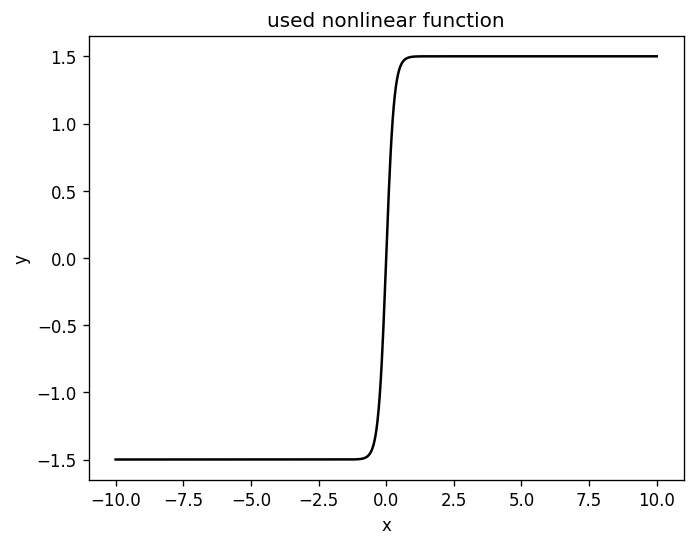

In [248]:
# defining the nonlinear operation... Here the sigmoid function.
def sigmoid(x):
    y=(3/(1+np.exp(-7*x))-1.5)
    #y=2*np.sin(x)
    return(y)

x=np.linspace(-10,10,1001)
y=sigmoid(x)

plt.plot(x,y,'k-')
plt.title("used nonlinear function")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [249]:
# Going from the input to final output.
# This function takes a 2 d vector (y1,y2) goes througth all the layers and gives final output
def f(y_in):
    global layerdims,w,b
    y=y_in
    for i in range(len(layerdims)):
        transfer=w[i]
        offset=b[i]
        z=np.dot(transfer,y)+offset  # doing the layer input to output linear transform
        z=np.array(z)
        y_out=sigmoid(z)
        y=y_out
        
    return(y)

In [250]:
m=400
y_out=np.zeros([m,m])
extent=100    # Extent of the plot

for i in range(m):
    for j in range(m):
        y1=(2*float(i)*1/m-1)*extent
        y2=(2*float(j)*1/m-1)*extent
        y_in=[y1,y2]
        y_in=np.array(y_in)        
        y_out[i,j]=f(y_in)

C:\Users\sagar\AppData\Local\Temp\ipykernel_7932\814295988.py:3: RuntimeWarning: overflow encountered in exp
  y=(3/(1+np.exp(-7*x))-1.5)


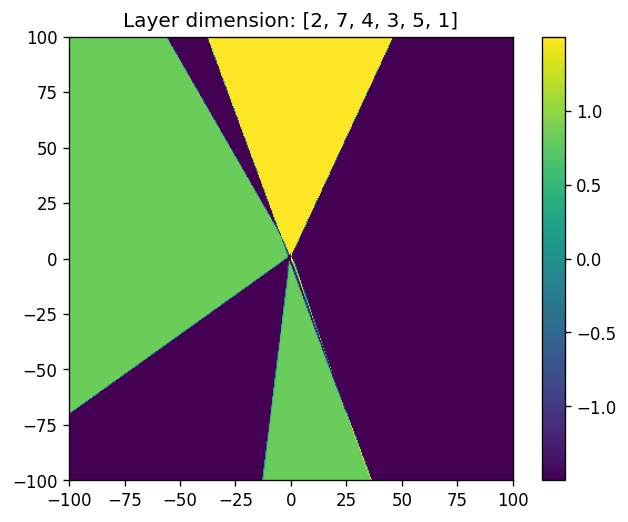

In [251]:
plt.imshow(y_out,extent=(-extent,extent,-extent,extent))
plt.title("Layer dimension: %s"%(str([2]+(layerdims))))
plt.colorbar()
plt.show()